## Road Freight in EU

We will pull data from eurostats and clean up the road freight data in EU.

### Install Packages

In [90]:
import pandas as pd
import numpy as np
import missingno as msno

### Load Data

Goods loaded in reporting country:

`https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_ia7lgtt.tsv.gz`

Good unloaded in reporting country:

`https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/road_go_iq_utt.tsv.gz`


In [5]:
source_loaded = "assets/road-freight-eurostats/road_go_ia_ltt.tsv"
source_unloaded = "assets/road-freight-eurostats/road_go_ia_utt.tsv"

In [83]:
df_load = pd.read_csv(source_loaded, sep='[\t|,]', na_values=[': ', ':'])
df_unload = pd.read_csv(source_unloaded, sep='[\t|,]', na_values=[': ', ':'])

/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/leima/anaconda3/envs/theflow-code/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [85]:
df_load.sample(10)

,unit,carriage,c_unload,geo\time,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
3536,MIO_TKM,TOT,LU,DK,NaN,8.0,1.0,4.0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3011,MIO_TKM,TOT,EL,SI,63.0,27.0,16.0,39.0,69.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,MIO_TKM,TOT,BG,NO,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3308,MIO_TKM,TOT,FR,EE,30.0,NaN,12.0,38.0,87.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,MIO_TKM,HIRE,GI,PT,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,MIO_TKM,HIRE,NO,LU,0.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,MIO_TKM,HIRE,UK,EL,289.0,245.0,191.0,105.0,209.0,113.0,...,23.0,52.0,94.0,75.0,59.0,60.0,70.0,56.0,46.0,41.0
978,MIO_TKM,HIRE,LV,IT,NaN,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,MIO_TKM,OWN,EX_YU,LU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404,MIO_TKM,TOT,IE,DE,NaN,NaN,8.0,NaN,NaN,13.0,...,4.0,4.0,8.0,9.0,9.0,15.0,15.0,16.0,13.0,11.0


In [86]:
df_unload.sample(10)

,unit,carriage,c_load,geo\time,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
1142,MIO_TKM,HIRE,RS,BG,19.0,65.0,90.0,75.0,80.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,MIO_TKM,HIRE,EXT_EU15,UK,NaN,NaN,NaN,NaN,NaN,NaN,...,279.0,303.0,220.0,167.0,0.0,0.0,117.0,109.0,108.0,104.0
2341,MIO_TKM,OWN,UA,SI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3009,MIO_TKM,TOT,EXT_EU15,LI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2921,MIO_TKM,TOT,EU27_2020,BG,2550.0,2958.0,4087.0,4703.0,3702.0,2930.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2938,MIO_TKM,TOT,EU27_2020,LU,1155.0,933.0,1461.0,1386.0,1286.0,1556.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3046,MIO_TKM,TOT,EX_YU,EU15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,MIO_TKM,HIRE,BE,LT,238.0,213.0,247.0,154.0,219.0,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2343,MIO_TKM,OWN,UK,AT,4.0,7.0,1.0,1.0,3.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,MIO_TKM,HIRE,PL,FR,101.0,NaN,NaN,NaN,NaN,NaN,...,85.0,54.0,31.0,19.0,7.0,NaN,NaN,NaN,NaN,NaN


### Clean Up 

The meaning of keys are illustrated here:
https://ec.europa.eu/eurostat/cache/metadata/en/road_go_esms.htm



rename columns

In [87]:
df_load.rename(
    columns={
        "geo\\time": "geo"
    },
    inplace=True
)

df_unload.rename(
    columns={
        "geo\\time": "geo"
    },
    inplace=True
)

In [88]:
for col in df_load.columns:
    df_load.rename(
        columns={
            col: col.strip()
        },
        inplace=True
    )

for col in df_unload.columns:
    df_unload.rename(
        columns={
            col: col.strip()
        },
        inplace=True
    )


In [89]:
df_load.replace({df_load["2019"].iloc[0], 1000})

,unit,carriage,c_unload,geo,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
0,MIO_TKM,HIRE,AD,CZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIO_TKM,HIRE,AD,DE,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MIO_TKM,HIRE,AD,ES,46.0,54.0,18.0,29.0,68.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIO_TKM,HIRE,AD,FR,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MIO_TKM,HIRE,AD,HU,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,MIO_TKM,TOT,WORLD,SE,1255.0,1453.0,1791.0,1658.0,1828.0,1617.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4124,MIO_TKM,TOT,WORLD,SI,5618.0,5661.0,5152.0,4702.0,4771.0,4308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4125,MIO_TKM,TOT,WORLD,SK,8472.0,8683.0,8290.0,8357.0,7902.0,6942.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,MIO_TKM,TOT,WORLD,UK,3073.0,3315.0,3072.0,2959.0,3487.0,3788.0,...,5604.0,5413.0,4519.0,3900.0,3255.0,2110.0,2003.0,2073.0,2037.0,1767.0


<AxesSubplot:>

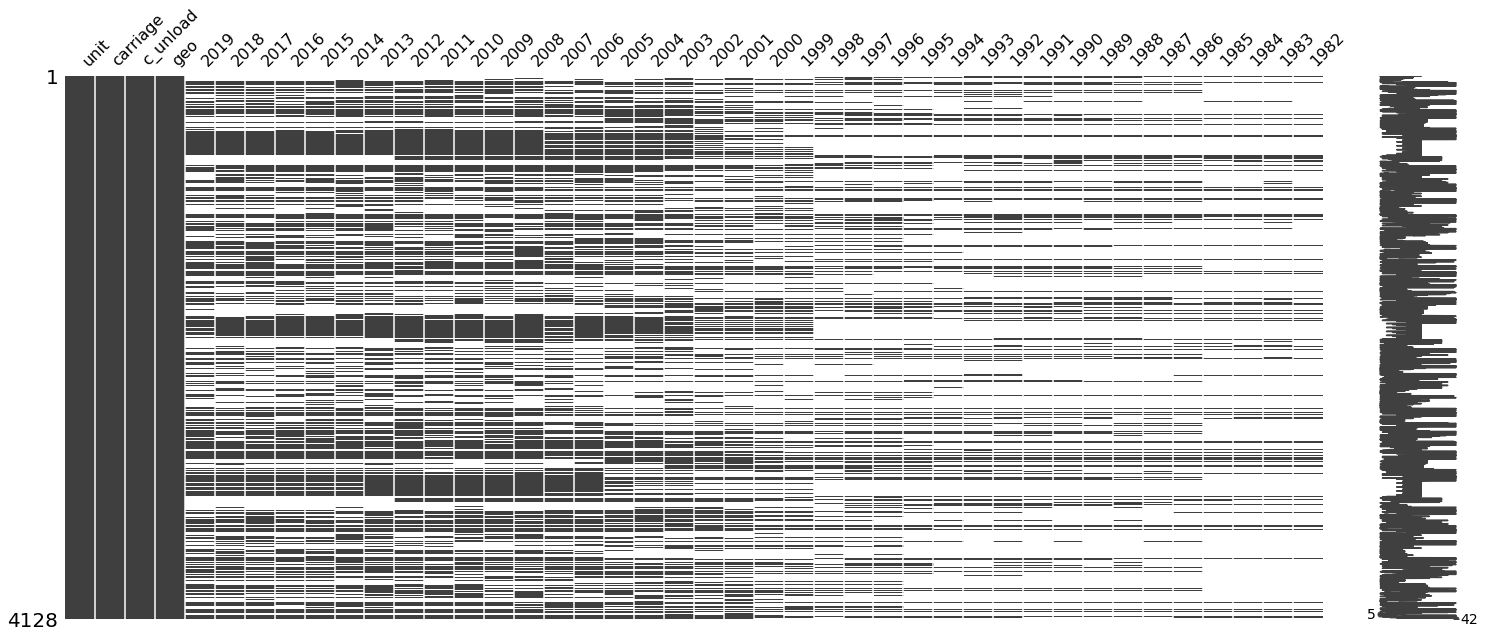

In [91]:
msno.matrix(df_load)

<AxesSubplot:>

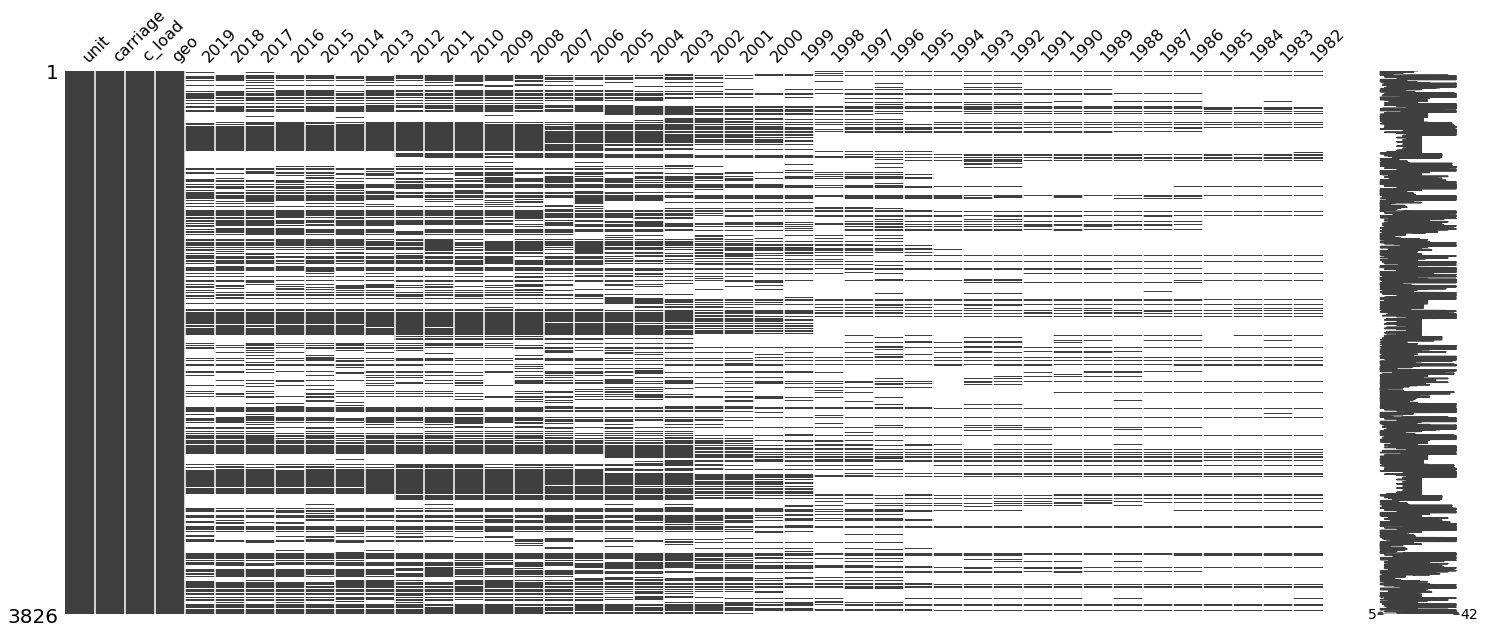

In [92]:
msno.matrix(df_unload)

Here is brief look into the data

In [102]:
df_load.columns

Index(['unit', 'carriage', 'c_unload', 'geo', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
       '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998',
       '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982'],
      dtype='object')

In [97]:
df_load_19.unit.unique()

array(['MIO_TKM'], dtype=object)

In [98]:
df_load.carriage.unique()

array(['HIRE', 'NOT_SPEC', 'OWN', 'TOT'], dtype=object)

- `HIRE`: hire or reward
- `OWN`: 

In [99]:
df_load.c_unload.unique()

array(['AD', 'AF', 'AFR_N', 'AL', 'AM', 'AT', 'AZ', 'BA', 'BE', 'BG',
       'BH', 'BY', 'CH', 'CY', 'CZ', 'CZ_SK', 'DE', 'DK', 'DZ', 'EA',
       'EE', 'EEA_X_LI', 'EG', 'EH', 'EL', 'ES', 'EU15', 'EU25',
       'EU27_2007', 'EU27_2020', 'EU28', 'EUR_OTH', 'EXT_EU15', 'EX_DD',
       'EX_SU', 'EX_YU', 'FI', 'FR', 'GE', 'GI', 'HR', 'HU', 'IE', 'IL',
       'IQ', 'IR', 'IS', 'IT', 'JO', 'KG', 'KZ', 'LB', 'LI', 'LT', 'LU',
       'LV', 'MA', 'MC', 'MD', 'ME', 'MK', 'MN', 'MT', 'NE', 'NL', 'NO',
       'OTH', 'PL', 'PT', 'RO', 'RS', 'RS_ME', 'RU', 'SE', 'SI', 'SK',
       'SL', 'SM', 'SY', 'TJ', 'TM', 'TN', 'TR', 'UA', 'UK', 'UNK', 'US',
       'UZ', 'VA', 'WORLD', 'XK'], dtype=object)

In [100]:
df_load.geo.unique()

array(['CZ', 'DE', 'ES', 'FR', 'HU', 'LU', 'NL', 'PT', 'UK', 'LV', 'DK',
       'EL', 'EU15', 'IE', 'IT', 'AT', 'BE', 'BG', 'CY', 'FI', 'HR', 'RO',
       'SE', 'SI', 'LT', 'PL', 'SK', 'CH', 'EE', 'LI', 'NO'], dtype=object)

For the purpose of demonstration, we will only use part of the data.

- We will only look at 2019
- We will only look at HIRE

In [108]:
df_load_19 = df_load[['unit', 'carriage', 'c_unload', 'geo', '2019']]
df_load_19_com = df_load.loc[
    df_load_19.carriage == "HIRE"
]
df_load_19_com#.sample(10)

,unit,carriage,c_unload,geo,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
0,MIO_TKM,HIRE,AD,CZ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MIO_TKM,HIRE,AD,DE,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MIO_TKM,HIRE,AD,ES,46.0,54.0,18.0,29.0,68.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MIO_TKM,HIRE,AD,FR,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MIO_TKM,HIRE,AD,HU,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,MIO_TKM,HIRE,WORLD,SE,1129.0,1368.0,1608.0,1603.0,1744.0,1512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,MIO_TKM,HIRE,WORLD,SI,5383.0,5394.0,4780.0,4407.0,4406.0,4021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,MIO_TKM,HIRE,WORLD,SK,8173.0,8400.0,7888.0,8041.0,7636.0,6729.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,MIO_TKM,HIRE,WORLD,UK,2678.0,2938.0,2602.0,2540.0,2888.0,3310.0,...,5379.0,5167.0,4289.0,3712.0,3159.0,1918.0,1788.0,1924.0,1906.0,1619.0


In [112]:
df_unload_19 = df_unload[['unit', 'carriage', 'c_load', 'geo', '2019']]
df_unload_19_com = df_unload.loc[
    df_unload_19.carriage == "HIRE"
]
df_unload_19_com.sample(10)

,unit,carriage,c_load,geo,2019,2018,2017,2016,2015,2014,...,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982
1071,MIO_TKM,HIRE,PL,HU,78.0,95.0,115.0,120.0,145.0,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,MIO_TKM,HIRE,IT,LU,16.0,21.0,10.0,27.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,24.0,12.0,24.0,15.0,10.0
535,MIO_TKM,HIRE,EU27_2020,NO,847.0,1035.0,1012.0,854.0,976.0,1039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,MIO_TKM,HIRE,RU,LT,292.0,272.0,202.0,238.0,241.0,423.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,MIO_TKM,HIRE,DE,HR,516.0,601.0,532.0,489.0,466.0,373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1218,MIO_TKM,HIRE,SE,FR,NaN,3.0,NaN,2.0,NaN,NaN,...,103.0,220.0,102.0,116.0,56.0,60.0,74.0,62.0,29.0,0.0
2,MIO_TKM,HIRE,AD,HU,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,MIO_TKM,HIRE,CY,HU,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,MIO_TKM,HIRE,EL,DE,NaN,31.0,52.0,31.0,23.0,52.0,...,55.0,63.0,79.0,71.0,66.0,63.0,57.0,62.0,68.0,83.0
1295,MIO_TKM,HIRE,TN,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df_load_19_com.to_csv("assets/road-freight-eurostats/eurostats_load_19_com.csv")